<a href="https://colab.research.google.com/github/emayes505/ML-models/blob/Bank_Churn/Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries and assign

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/content/Customer-Churn-Records.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1320,1321,15596493,Wisdom,687,France,Female,47,7,0.00,2,1,1,177624.01,0,0,1,DIAMOND,517
6973,6974,15583394,Zuyev,659,Germany,Male,39,8,106259.63,2,1,1,198103.32,0,0,3,PLATINUM,296
4415,4416,15575955,Lujan,764,France,Female,24,0,0.00,2,1,0,88724.49,0,0,3,GOLD,470
3186,3187,15649668,Wilhelm,637,Germany,Female,36,10,145750.45,2,1,1,96660.76,0,0,1,DIAMOND,407
1466,1467,15650391,Wallace,633,France,Female,29,7,169988.35,1,1,0,4272.00,0,0,3,DIAMOND,613


using df.drop, we are updating the dataset to exclude certain datapoints that have insignificant information to predict outcomes.


In [31]:
df.drop('CustomerId', axis=1, inplace = True)
df.drop('Surname', axis=1, inplace = True)
df.drop('RowNumber', axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [32]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [33]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [34]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [35]:
df.Age.unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [36]:
df.Tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [37]:
df.Balance.unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

In [38]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
2993,745,Spain,Female,59,8,0.00,1,1,1,36124.98,0,0,2,DIAMOND,949
8656,660,Spain,Male,31,1,84560.04,1,1,1,137784.25,0,0,1,PLATINUM,357
4622,564,Spain,Male,48,5,132876.23,1,1,0,79259.77,0,0,1,DIAMOND,741
2509,655,France,Female,50,10,0.00,4,1,0,179267.94,1,1,1,GOLD,889
1166,622,Germany,Female,28,1,143124.63,2,1,0,81723.80,0,0,4,GOLD,295


In [39]:
df.shape

(10000, 15)

In [40]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [43]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [45]:
df['Gender'].replace({'Female':1, 'Male': 0}, inplace = True)

/tmp/ipython-input-1368520745.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female':1, 'Male': 0}, inplace = True)
/tmp/ipython-input-1368520745.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Female':1, 'Male': 0}, inplace = True)


In [46]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [47]:
df.Gender.unique()

array([1, 0])

In [52]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [53]:
df1 = pd.get_dummies(data=df, columns=['Card Type', 'Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [55]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_France,Geography_Germany,Geography_Spain
8677,609,1,40,10,137389.77,2,1,0,170122.22,0,0,1,988,False,True,False,False,False,True,False
43,834,1,49,2,131394.56,1,0,0,194365.76,1,1,2,567,False,True,False,False,True,False,False
3783,647,1,26,8,109958.15,1,1,1,136592.24,1,1,2,271,False,True,False,False,False,False,True
9942,739,1,25,5,113113.12,1,1,0,129181.27,0,0,5,796,True,False,False,False,False,True,False
8100,663,0,40,6,156218.19,1,0,1,33607.72,0,0,5,375,False,False,False,True,True,False,False
6516,607,1,32,7,0.00,3,0,1,10674.62,0,0,4,701,True,False,False,False,False,False,True
5894,583,0,39,1,129299.28,2,1,0,73107.60,0,0,1,378,True,False,False,False,True,False,False
1026,628,0,33,6,0.00,2,0,0,184230.23,0,0,3,529,False,False,False,True,True,False,False
9555,782,1,72,5,148666.99,1,1,0,2605.65,1,1,4,705,False,True,False,False,False,True,False
8579,650,0,34,4,106005.54,1,0,1,142995.32,0,0,4,387,False,False,True,False,True,False,False


In [57]:
df1.dtypes

,0
CreditScore,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64


In [62]:
cols_to_scale = ['CreditScore', 'Point Earned', 'Age', 'Satisfaction Score', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [63]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_France,Geography_Germany,Geography_Spain
6935,0.640,0,0.202703,0.1,0.000000,0.333333,1,1,0.432049,0,0,0.50,0.884222,True,False,False,False,True,False,False
9814,0.562,0,0.243243,0.1,0.000000,0.333333,0,0,0.665712,0,0,0.50,0.494892,False,False,False,True,True,False,False
7020,0.602,0,0.135135,0.7,0.000000,0.333333,1,0,0.004062,0,0,0.00,0.299659,False,False,False,True,True,False,False
186,0.760,1,0.283784,0.1,0.394625,0.000000,1,0,0.974764,0,0,1.00,0.160045,False,True,False,False,True,False,False
5344,0.874,0,0.094595,0.5,0.000000,0.333333,1,0,0.236504,0,0,0.75,0.720772,True,False,False,False,True,False,False
2273,0.752,1,0.121622,0.7,0.493531,0.000000,0,1,0.394833,0,0,0.25,0.472191,False,True,False,False,False,False,True
8912,0.546,1,0.081081,0.7,0.590550,0.333333,1,1,0.547346,0,0,0.50,0.868331,False,False,True,False,True,False,False
913,0.812,0,0.121622,0.1,0.525707,0.000000,1,0,0.466498,0,0,0.75,0.373439,False,False,False,True,False,True,False
2118,0.220,1,0.121622,0.7,0.000000,0.333333,1,0,0.780767,1,1,0.50,0.204313,False,False,True,False,True,False,False
5710,0.856,0,0.216216,0.5,0.554265,0.333333,0,0,0.339721,0,0,0.25,0.885358,False,False,False,True,True,False,False


In [61]:
df1.NumOfProducts.unique()

array([1, 3, 2, 4])

In [65]:
for col in df1:
    print(f'{col}:) {df1[col].unique()}')

CreditScore:) [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [67]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_France,Geography_Germany,Geography_Spain
3317,0.858,0,0.716216,0.3,0.000000,0.333333,1,1,0.734489,1,1,0.00,0.838820,False,False,True,False,True,False,False
6140,0.276,1,0.175676,0.8,0.388957,0.000000,0,0,0.621054,0,0,0.25,0.673099,False,False,False,True,True,False,False
4092,0.466,1,0.297297,0.4,0.000000,0.333333,1,0,0.570465,0,0,0.25,0.345062,True,False,False,False,False,False,True
933,0.324,0,0.243243,0.1,0.000000,0.000000,0,1,0.677418,1,1,0.75,0.767310,False,False,True,False,False,False,True
8200,0.834,0,0.391892,0.5,0.000000,0.000000,1,0,0.609823,1,1,1.00,0.174801,False,True,False,False,False,False,True
7784,0.782,1,0.621622,0.2,0.276252,0.000000,1,1,0.296159,0,0,0.00,0.300795,False,True,False,False,True,False,False
9423,0.456,1,0.135135,0.8,0.644057,0.000000,1,0,0.889201,0,0,0.25,0.246311,False,True,False,False,False,False,True
7466,0.700,1,0.162162,0.4,0.463844,0.000000,1,1,0.672093,0,0,0.00,0.585698,False,False,False,True,False,True,False
9028,0.480,1,0.364865,0.2,0.326141,0.000000,1,0,0.260807,0,0,0.00,0.649262,False,False,False,True,True,False,False
5969,0.384,1,0.148649,0.7,0.000000,0.333333,0,1,0.983295,0,0,0.50,0.728717,True,False,False,False,True,False,False


Data Fully prepared. Insert into ML model

In [68]:
x = df1.drop('Exited', axis=1)
y = df1['Exited']

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [70]:
x_train.shape

(8000, 19)

In [71]:
x_test.shape

(2000, 19)

In [72]:
len(x_train.columns)

19

In [77]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8210 - loss: 0.4231
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9975 - loss: 0.0408
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0084
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9987 - loss: 0.0098
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9989 - loss: 0.0081
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9981 - loss: 0.0117
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9985 - loss: 0.0099
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9983 - loss: 0.0110
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9987 - loss: 0.0086
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0087
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9988 - loss: 0.0083
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

In [79]:
model.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9998 - loss: 0.0026


[0.004247892182320356, 0.9994999766349792]

In [81]:
yp = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [82]:
yp[:5]

array([[9.9429327e-01],
       [1.3073072e-06],
       [2.7288827e-03],
       [3.9971992e-03],
       [4.6783705e-05]], dtype=float32)

In [83]:
y_test[:5]

,Exited
1367,1
752,0
1696,0
9236,0
1084,0


In [87]:
import numpy as np
print(np.round(yp[:10], 3))

[[0.994]
 [0.   ]
 [0.003]
 [0.004]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.998]
 [0.001]
 [0.999]]


In [88]:
y_test[:10]

,Exited
1367,1
752,0
1696,0
9236,0
1084,0
5417,0
3901,0
499,1
8826,0
9718,1


In [89]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [90]:
y_pred[:10]

[1, 0, 0, 0, 0, 0, 0, 1, 0, 1]

In [91]:
y_test[:10]

,Exited
1367,1
752,0
1696,0
9236,0
1084,0
5417,0
3901,0
499,1
8826,0
9718,1


In [92]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1583
           1       1.00      1.00      1.00       417

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

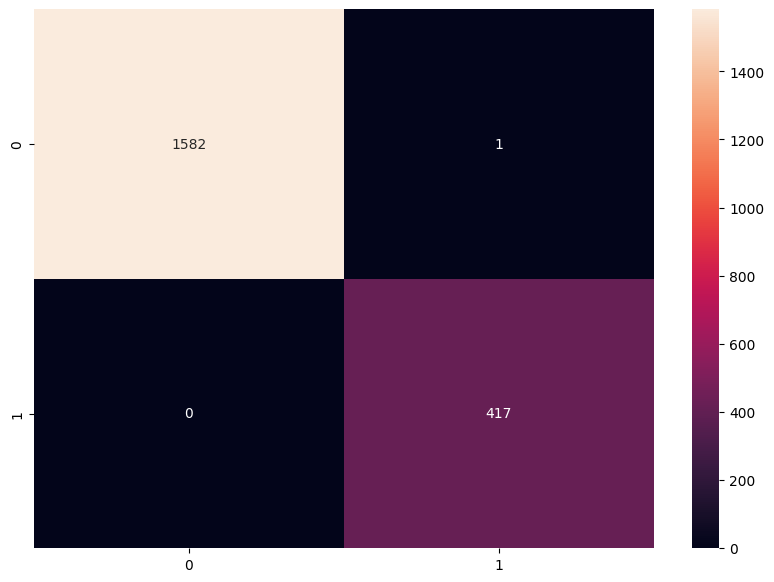

In [95]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt

This prediction is almost 100% accuracy with only 1 out of 2000 predictions are incorrect